In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [16]:
# Import the data

import data_outcomes as data
df=data.getDiabetesBehaviorDataframe()
df.head()

----> Retrieving information for Resources/diabetes_data.csv


,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,1.0,18.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0
8,3.0,0.0,0.0,1.0,32.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
10,12.0,0.0,1.0,1.0,24.0,1.0,1.0,1.0,1.0,1.0,0.0,3.0,0.0,4.0,0.0,0.0,1.0,0.0
14,10.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [17]:
# Create the labels set `y` and features DataFrame `X`
y = df["Diabetes"]


X = df.copy()
X = X.drop(columns="Diabetes")

In [18]:
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP
9259,7.0,0.0,1.0,1.0,21.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,10.0,0.0,0.0,0.0,0.0
24038,10.0,0.0,1.0,1.0,25.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
34780,5.0,0.0,0.0,1.0,20.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,7.0,1.0,0.0,0.0,0.0
54624,12.0,0.0,0.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,5.0,1.0,0.0,0.0
4411,6.0,0.0,0.0,1.0,22.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [19]:
from sklearn.preprocessing import StandardScaler

# Create the StandardScaler instance
scaler = StandardScaler()


In [20]:
# Fit the Standard Scaler with the training data
X_train_scaled= scaler.fit(X_train)

In [21]:
# Scale the training data
X_train_scale = X_train_scaled.transform(X_train)
X_test_scale = X_train_scaled.transform(X_test)

In [22]:
# Define a parameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300],      
    'max_depth': [10, 20, 30],          
    'min_samples_split': [2, 5, 10],      
    'min_samples_leaf': [1, 2, 4],       
    'bootstrap': [True, False]}

In [29]:
# Initialize RandomForest and GridSearchCV
model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
# Fit the grid search to the data
#grid_search.fit(X_train_scaled, y)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Print best parameters and score
#print(f"Best parameters: {grid_search.best_params_}")
#print(f"Best cross-validation score: {grid_search.best_score_}")

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [30]:
#Feature Importance Plot
importances = best_model.feature_importances_
feature_names = X.columns

# Sort and plot the feature importances
sorted_indices = importances.argsort()
plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_indices], importances[sorted_indices])
plt.xlabel("Random Forest Feature Importance")
plt.show()



NameError: name 'best_model' is not defined

In [12]:
#  Cross-validation
from sklearn.model_selection import cross_val_score

In [13]:
# Perform 5-fold cross-validation on the best model
cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Print average cross-validation score
print(f"Average 5-Fold CV Score: {cv_scores.mean()}")

NameError: name 'best_model' is not defined

In [ ]:
#  Handling Class Imbalance (Optional)
# If your dataset is imbalanced (more non-diabetes than diabetes cases), you can add class_weight='balanced'
balanced_model = RandomForestClassifier(random_state=42, class_weight='balanced')
balanced_model.fit(X_train_scaled, y_train)

# Predict and evaluate the balanced model
y_pred_balanced = balanced_model.predict(X_test_scaled)
print(f"Balanced model accuracy: {accuracy_score(y_test, y_pred_balanced)}")

In [ ]:
#Ensemble Methods (Optional)
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Define individual models
clf1 = LogisticRegression()
clf2 = RandomForestClassifier(n_estimators=200)
clf3 = SVC()

# Combine them into a voting classifier
voting_clf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('svc', clf3)], voting='hard')

# Train the voting classifier
voting_clf.fit(X_train_scaled, y_train)

# Make predictions and evaluate the ensemble model
y_pred_ensemble = voting_clf.predict(X_test_scaled)
print(f"Voting Classifier accuracy: {accuracy_score(y_test, y_pred_ensemble)}")

In [9]:
# Train a Random Forest Classifier model and print the model score
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=1)
model.fit(X_train_scale, y_train)

RandomForestClassifier(random_state=1)

In [10]:
# Make and save testing predictions with the saved logistic regression model using the test data
test_pred = model.predict(X_test_scale)
# Review the predictions
test_pred

array([1., 0., 0., ..., 1., 0., 1.])

In [11]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.

accuracy_score(y_test, test_pred)

0.7290782549652012

In [25]:
X_train.shape

(53019, 17)

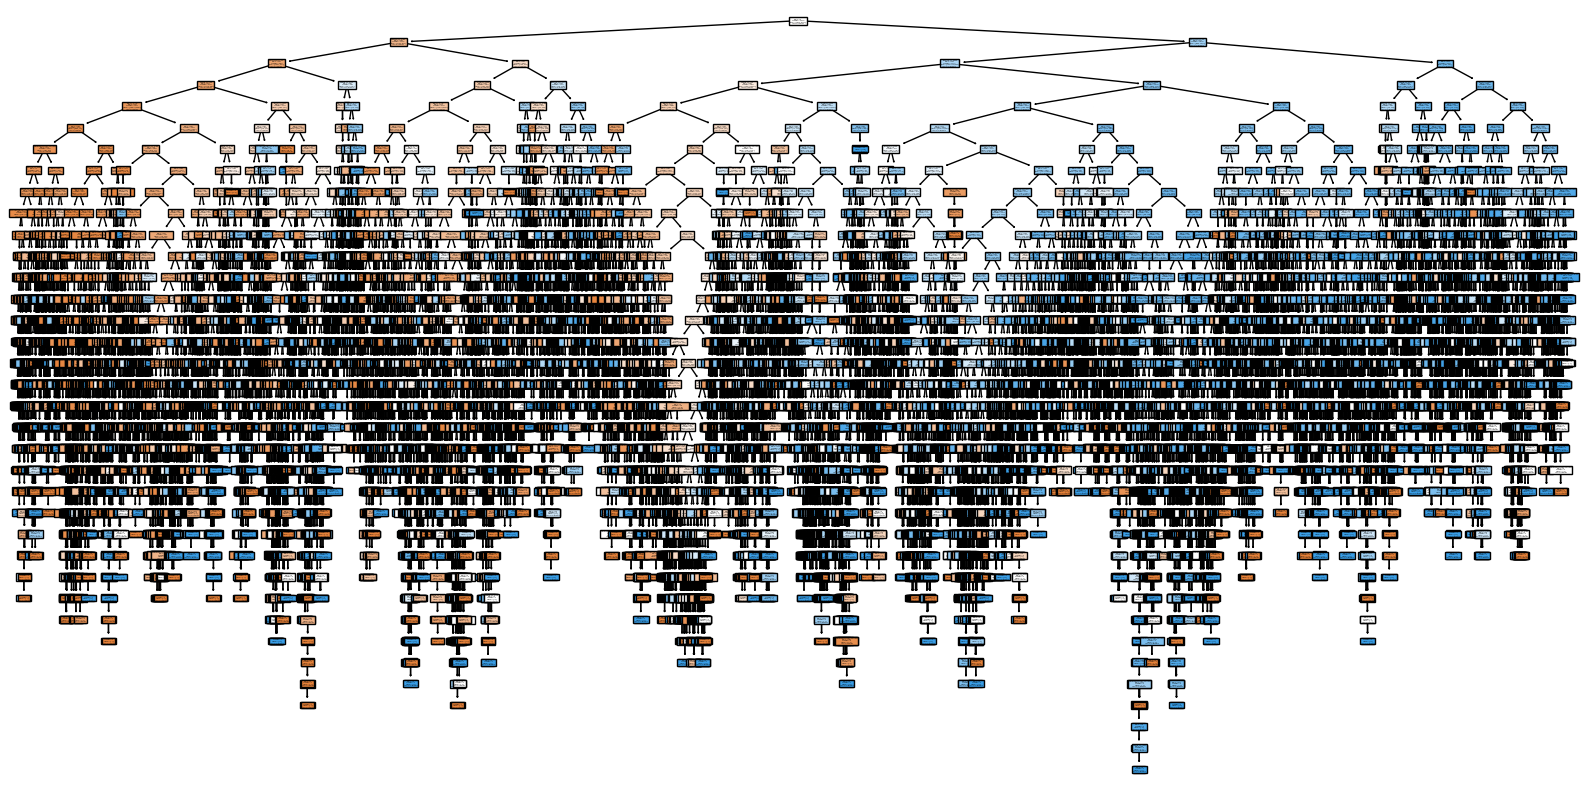

In [27]:
# Extract a single tree from the Random Forest (e.g., the first tree)
tree = model.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(tree, feature_names=["BMI","Age","HighChol","CholCheck","Smoker","HeartDiseaseorAttack","PhysActivity","Fruits","Veggies","HvyAlcoholConsump","GenHlth","MentHlth","PhysHlth","DiffWalk","Stroke","HighBP","Sex" ], class_names=["Diabetes","No Diabetes"], filled=True) 

# Show plot
plt.show()